In [11]:
# default_exp train
%load_ext autoreload
%autoreload 2

In [18]:
#export
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

from Cifar_pytorch import dataloader

In [94]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = dataloader.CifarDownloadedDataset(root_dir='./data/cifar-10-batches-py/', 
                                             train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = dataloader.CifarDownloadedDataset(root_dir='./data/cifar-10-batches-py/', 
                                             train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


appending:  data_batch_5
appending:  data_batch_4
appending:  data_batch_1
appending:  data_batch_3
appending:  data_batch_2
appending:  test_batch


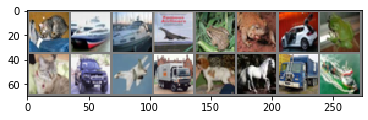

  cat  ship  ship plane  frog  frog   car  frog   cat   car plane truck   dog horse truck  ship


In [93]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(testloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(16)))

In [111]:
class Net(nn.Module):
    
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.linear1 = nn.Linear(16 * 5 * 5, 120)
        self.linear2 = nn.Linear(120, 84)
        self.linear3 = nn.Linear(84, 10)
    
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.linear1(x))
        x = F.relu(self.linear2(x))
        x = self.linear3(x)
        return x
    
net = Net()

In [112]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [113]:
#export
def eval_model_accuracy(model, loader):
    with torch.no_grad():
        total = 0
        correct = 0
        for images, labels in loader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        print('\n\n Accuracy: %.3f \n\n'%(correct * 100/total))

In [114]:
epochs = 10

for epoch in range(epochs):
    print('epoch: ',epoch)
    print('----------------')
    running_loss = 0.0
    for  i, data in enumerate(trainloader, 0):
        image, target = data

        optimizer.zero_grad()

        output = net(image)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 3000 == 2999:
            running_loss /= 3000
            print('loss: %.3f'%(running_loss))
            running_loss = 0.0
    
    eval_model_accuracy(model=net, loader=testloader)

epoch:  0
----------------
loss: 2.164
loss: 1.755
loss: 1.604
loss: 1.500


 Accuracy: 48.250 


epoch:  1
----------------
loss: 1.412
loss: 1.361
loss: 1.341
loss: 1.293


 Accuracy: 54.870 


epoch:  2
----------------
loss: 1.222
loss: 1.228
loss: 1.211
loss: 1.196


 Accuracy: 56.840 


epoch:  3
----------------
loss: 1.117
loss: 1.132
loss: 1.123
loss: 1.108


 Accuracy: 55.760 


epoch:  4
----------------
loss: 1.051
loss: 1.059
loss: 1.049
loss: 1.067


 Accuracy: 59.300 


epoch:  5
----------------
loss: 0.959
loss: 1.011
loss: 1.012
loss: 1.016


 Accuracy: 62.410 


epoch:  6
----------------
loss: 0.938
loss: 0.954
loss: 0.957
loss: 0.976


 Accuracy: 62.360 


epoch:  7
----------------
loss: 0.871
loss: 0.905
loss: 0.935
loss: 0.961


 Accuracy: 61.610 


epoch:  8
----------------
loss: 0.847
loss: 0.894
loss: 0.897
loss: 0.908


 Accuracy: 62.490 


epoch:  9
----------------
loss: 0.820
loss: 0.829
loss: 0.882
loss: 0.868


 Accuracy: 61.910 


